# Técnica de Regressão - Seleção de Modelos

#### **Contextualização**

A empresa Mineral Forte está em busca de um modelo preditivo eficiente para estimar a resistência à compressão do concreto produzido em sua unidade. Essa propriedade é fundamental para garantir a segurança e qualidade das estruturas desenvolvidas pela empresa.

Para isso, os engenheiros pretendem utilizar dados relacionados aos componentes da mistura do concreto e à idade do material. As variáveis envolvidas no desenvolvimento do modelo incluem:
  
  * Variáveis de entrada:
    * Cimento [kg/m³];
    * Escoria [kg/m³];
    * Cinzas [kg/m³];
    * Superplastificante [kg/m³];
    * Agregado graúdo [kg/m³];
    * Agregado miúdo [kg/m³];
    * Idade [dias].
  
  * Variável de saída:
    * Resistência à compressão [MPa].

O objetivo deste projeto é comparar dois algoritmos distintos de aprendizado de máquina, avaliando qual deles apresenta melhor desempenho na predição da resistência do concreto.

O conjunto de dados necessário para realizar essa análise está disponível no arquivo df_concreto.csv.

# Importação das bibliotecas

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [21]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Carregar o banco de dados e Primeiras análises

In [22]:
df = pd.read_csv('df_concreto.csv')

In [23]:
df.head()

,Cimento,Escoria,Cinzas,Agua,Superplastificante,Agregado graudo,Agregado miudo,Idade,Resistencia a compressao
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [24]:
df.shape

(1030, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cimento                   1030 non-null   float64
 1   Escoria                   1030 non-null   float64
 2   Cinzas                    1030 non-null   float64
 3   Agua                      1030 non-null   float64
 4   Superplastificante        1030 non-null   float64
 5   Agregado graudo           1030 non-null   float64
 6   Agregado miudo            1030 non-null   float64
 7   Idade                     1030 non-null   int64  
 8   Resistencia a compressao  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 80.5 KB


In [26]:
df.describe()

,Cimento,Escoria,Cinzas,Agua,Superplastificante,Agregado graudo,Agregado miudo,Idade,Resistencia a compressao
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [27]:
df.isna().sum()

Cimento                     0
Escoria                     0
Cinzas                      0
Agua                        0
Superplastificante          0
Agregado graudo             0
Agregado miudo              0
Idade                       0
Resistencia a compressao    0
dtype: int64

# Análise Exploratória dos Dados

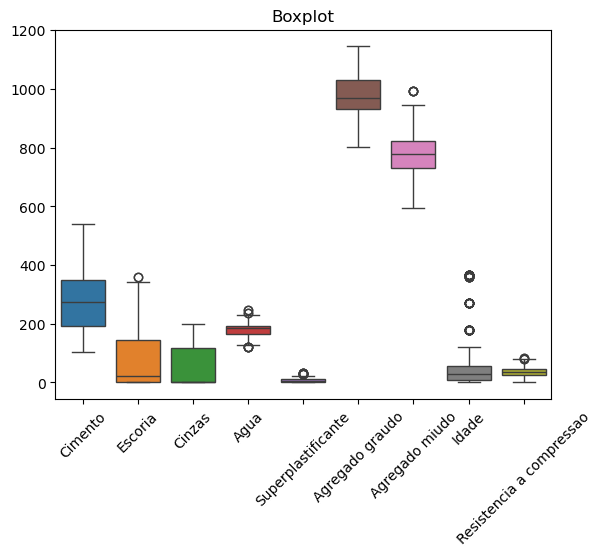

In [28]:
sns.boxplot(data=df)
plt.title('Boxplot')
plt.xticks(rotation=45)
plt.show()

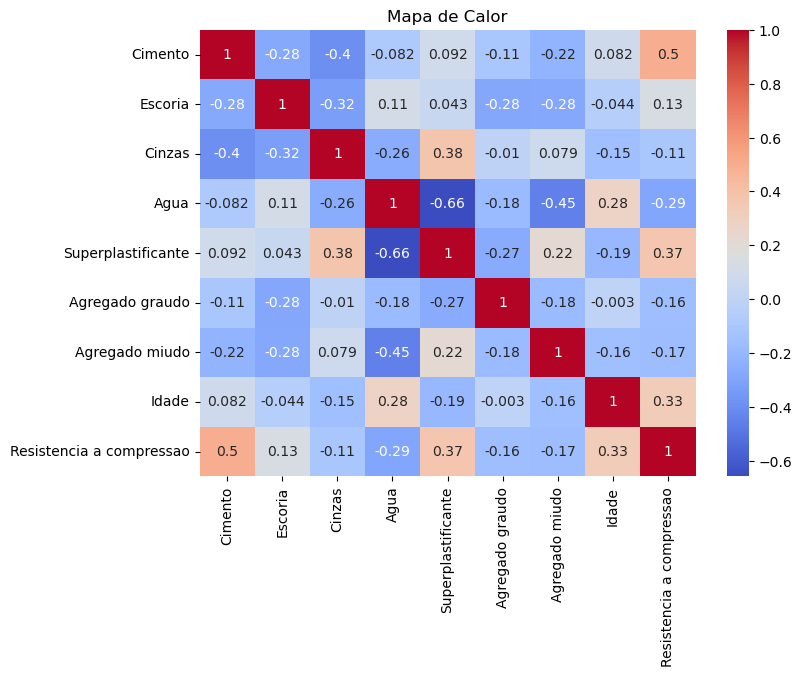

In [29]:
corr = df.corr()
plt.figure(figsize=(8,5.8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor')
plt.show()

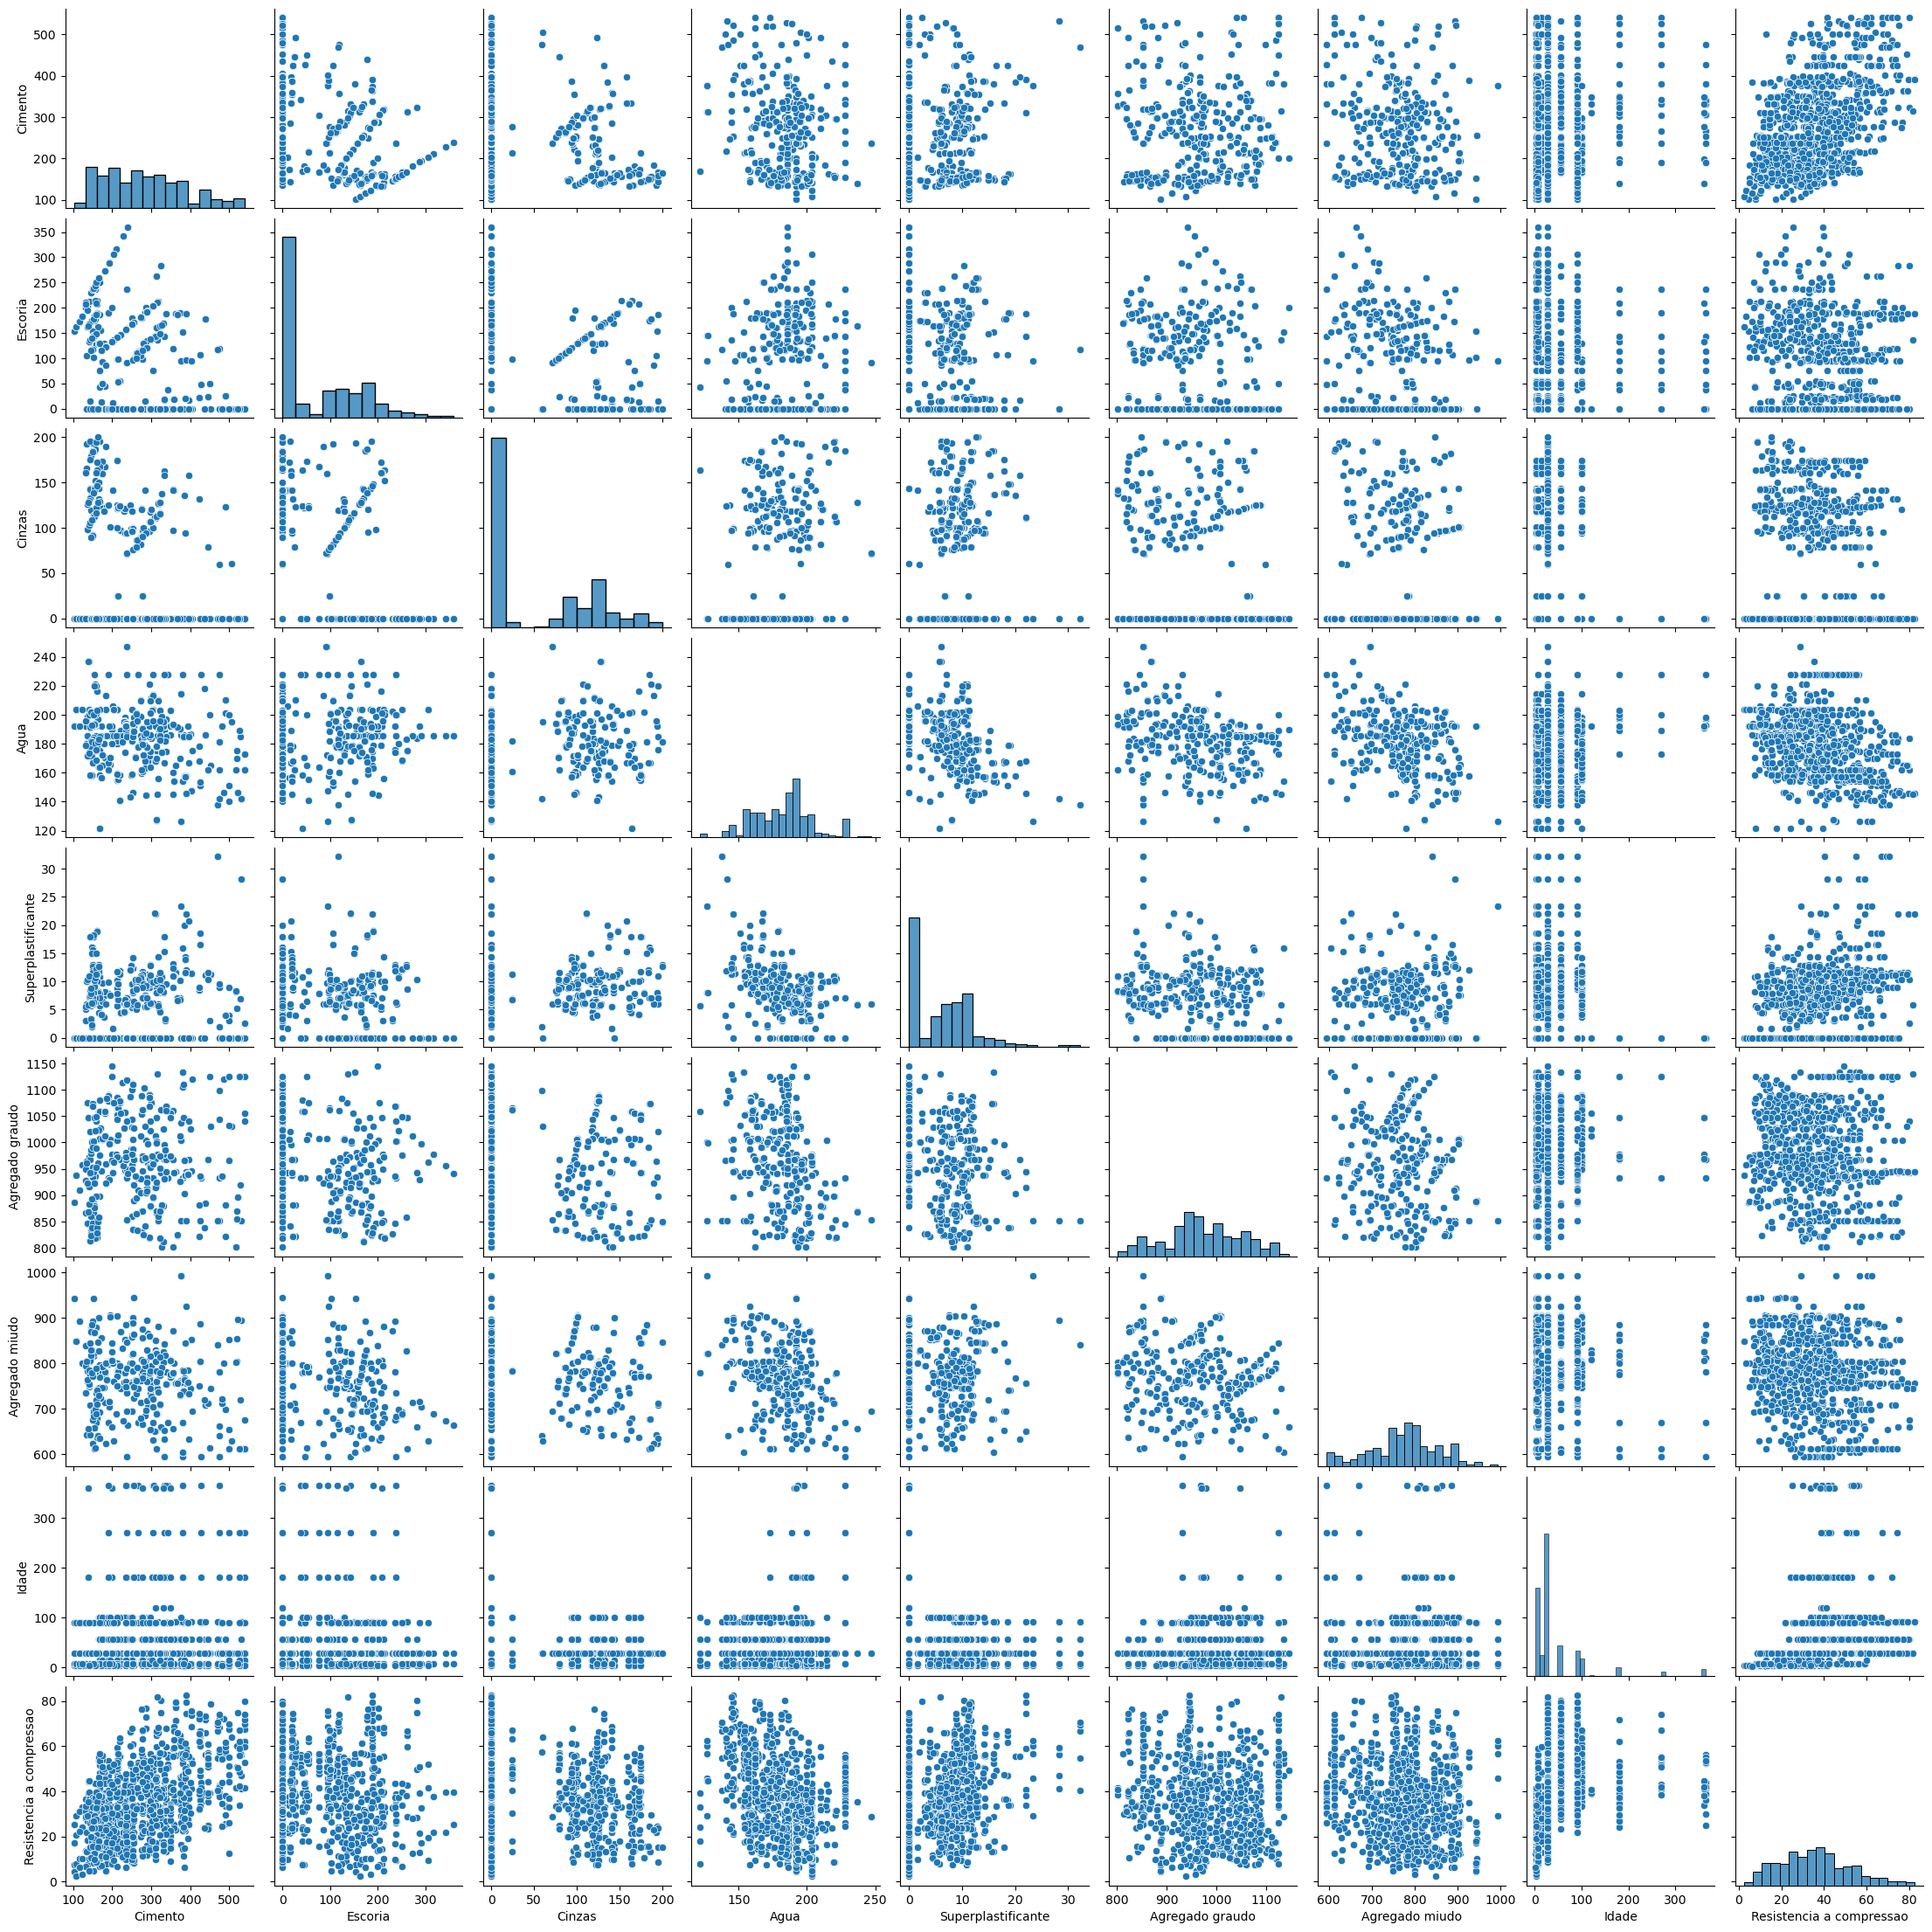

In [30]:
sns.pairplot(df)
plt.show()

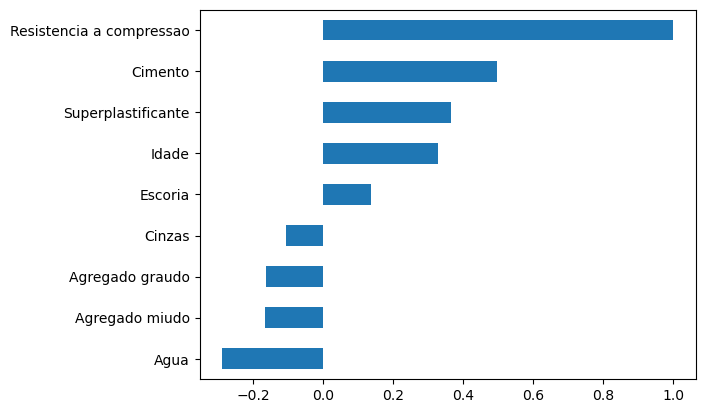

In [31]:
corr['Resistencia a compressao'].sort_values().plot(kind='barh')
plt.show()

# Separar as variáveis de entrada (X) e saída (y)

In [32]:
X = df.drop(['Resistencia a compressao'], axis=1)
y = df[['Resistencia a compressao']]

# Divisão do banco de dados

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=60)

# Normalização dos dados

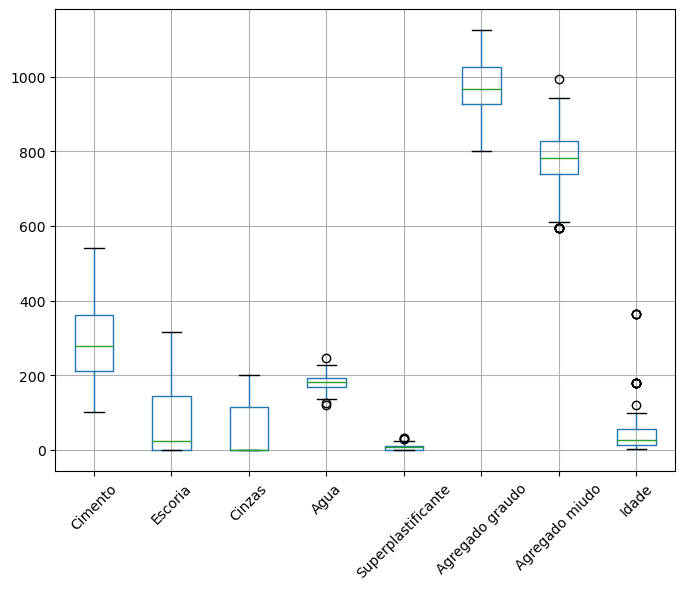

In [34]:
X_train.boxplot(grid=True, rot=45, figsize=(8,6))
plt.show()

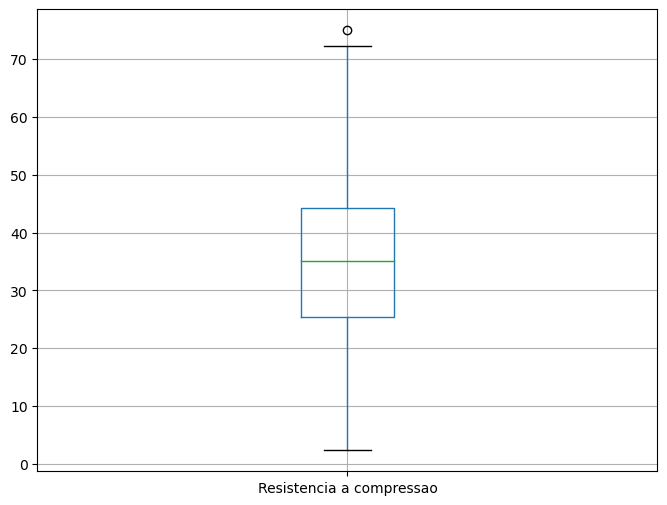

In [35]:
y_train.boxplot(grid=True, rot=0, figsize=(8,6))
plt.show()

In [36]:
# Normalização dos dados de entrada
scaler_input = MinMaxScaler(feature_range=(-1,1))
scaler_input.fit(X_train)

X_train_norm = scaler_input.transform(X_train)
X_test_norm = scaler_input.transform(X_test)

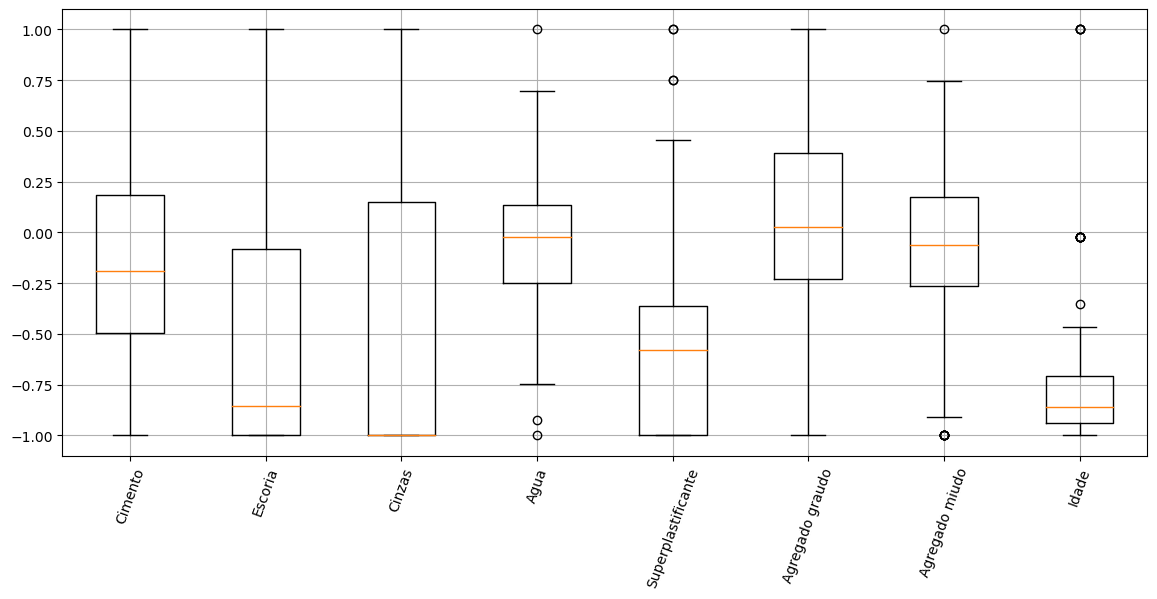

In [37]:
# Boxplot do X_train_norm
plt.figure(figsize=(14,5.8))
plt.boxplot(X_train_norm)
plt.grid(True)
plt.xticks(ticks=np.arange(1,X_train_norm.shape[1]+1), labels=X.columns, rotation=70)
plt.show()

In [38]:
# Normalização dos dados de saída
scaler_output = MinMaxScaler(feature_range=(-1,1))
scaler_output.fit(y_train)

y_train_norm = scaler_output.transform(y_train)
y_test_norm = scaler_output.transform(y_test)

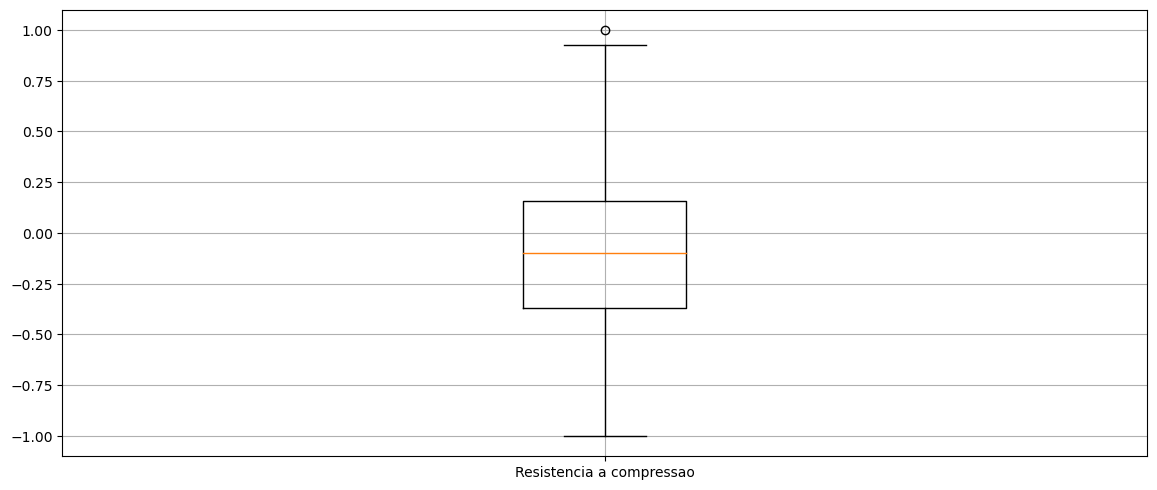

In [39]:
# Boxplot do X_train_norm
plt.figure(figsize=(14,5.8))
plt.boxplot(y_train_norm)
plt.grid(True)
plt.xticks(ticks=np.arange(1,y_train_norm.shape[1]+1), labels=y.columns, rotation=0)
plt.show()

# Aplicação do Modelo

## Definição dos Hiperparâmetros

In [40]:
# Definir os valores de hiperparâmetros para Floresta Aleatória
max_depth = [1,4,10,100,1000]
min_samples_split = [2,4,10,100,1000]
parameters_forest = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
scores_df_forest = pd.DataFrame(index=max_depth, columns=min_samples_split)

In [41]:
# Definir os valores de hiperparâmetros para Máquina de Vetores de Suporte
C = [0.001,0.1,1,10,100]
gamma = [0.001,0.1,1,10,100]
parameters_svm = {'C':C,'gamma':gamma}
scores_df_svm = pd.DataFrame(index=gamma, columns=C)

In [42]:
# Instanciar o modelo de predição Floresta Aleatória
model_forest = RandomForestRegressor(random_state=50)

In [43]:
# Instanciar o modelo de predição Máquina de Vetores de Suporte
model_svm = SVR()

In [44]:
# Busca em grade em conjunto com a técnica k-fold cross validation

cv = 10

"""Busca em grade - floresta aleatória"""
grid_search_forest = GridSearchCV(estimator=model_forest, param_grid=parameters_forest, scoring='neg_mean_squared_error', cv=cv)
grid_search_forest.fit(X_train_norm, y_train_norm.ravel())

"""Busca em grade - máquina de vetores de suporte"""
grid_search_svm = GridSearchCV(estimator=model_svm, param_grid=parameters_svm, scoring='neg_mean_squared_error', cv=cv)
grid_search_svm.fit(X_train_norm, y_train_norm.ravel())

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [45]:
# Floresta aleatória - acessar os hiperparâmetros selecionados via busca em grade:
grid_search_forest.best_params_

{'max_depth': 100, 'min_samples_split': 2}

In [46]:
# Máquina de vetores de suporte - acessar os hiperparâmetros selecionados via busca em grade
grid_search_svm.best_params_

{'C': 10, 'gamma': 0.1}

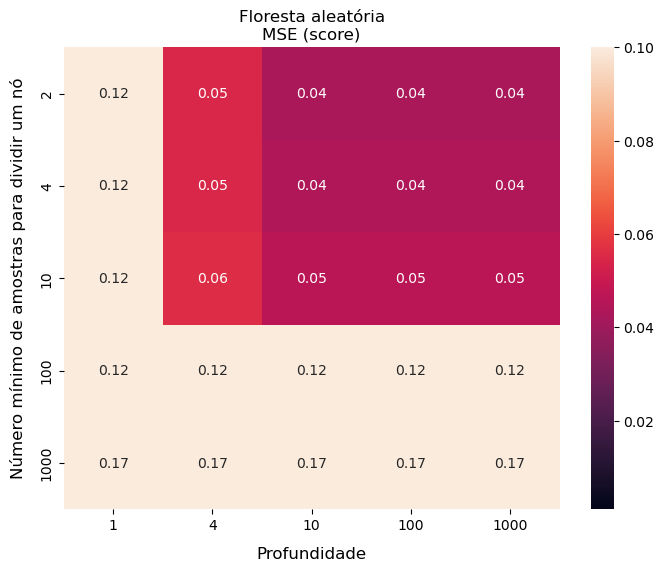

In [47]:
"""Floresta aleatória - mapa de calor com os hiperparâmetros da busca em grade"""
# Salvar todas as informações da busca em grade num dataframe
info_grid_search_forest = pd.DataFrame.from_dict(grid_search_forest.cv_results_)

# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['max_depth'] = pd.to_numeric(info_grid_search_forest['param_max_depth'].values)
scores_df['min_samples_split'] = pd.to_numeric(info_grid_search_forest['param_min_samples_split'].values)
scores_df['mean_test_score'] = -pd.to_numeric(info_grid_search_forest['mean_test_score'].values)
scores_df = scores_df.pivot(index='min_samples_split', columns='max_depth', values='mean_test_score')

# Criar uma figura do tipo mapa de calor (heatmap)
# A figura do tipo mapa de calor (heatmap) vai auxiliar na visualização das métricas atreladas a cada combinação da busca em grade:
plt.figure(figsize=(8,6))
ax = sns.heatmap(scores_df, annot=True, fmt=".2f", linewidths=0.001, vmin=0.001, vmax=0.1, cbar=True)
ax.set_title('Floresta aleatória\nMSE (score)', fontsize=12)
ax.set_ylabel(ylabel='Número mínimo de amostras para dividir um nó', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='Profundidade', fontsize=12, labelpad=10)
plt.show()

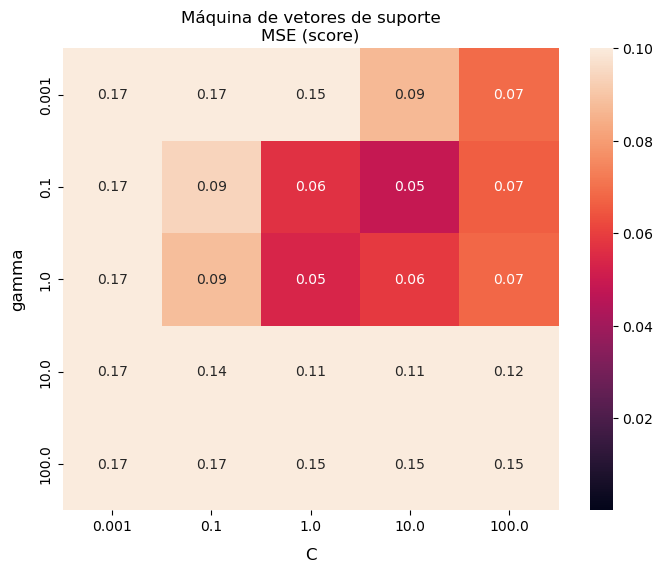

In [48]:
"""Máquina de vetores de suporte - mapa de calor com os hiperparâmetros da busca em grade"""

# Salvar todas as informações da busca em grade num dataframe
info_grid_search_svm = pd.DataFrame.from_dict(grid_search_svm.cv_results_)

# Criar um dataframe a fim de criar um mapa de calor
scores_df = pd.DataFrame()
scores_df['C'] = pd.to_numeric(info_grid_search_svm['param_C'].values)
scores_df['gamma'] = pd.to_numeric(info_grid_search_svm['param_gamma'].values)
scores_df['mean_test_score'] = -pd.to_numeric(info_grid_search_svm['mean_test_score'].values)
scores_df = scores_df.pivot(index='gamma', columns='C', values='mean_test_score')

# Criar uma figura do tipo mapa de calor (heatmap)
# A figura do tipo mapa de calor (heatmap) vai auxiliar na visualização das métricas atreladas a cada combinação da busca em grade:
plt.figure(figsize=(8,6))
ax = sns.heatmap(scores_df, annot=True, fmt=".2f", linewidths=0.001, vmin=0.0001, vmax=0.1, cbar=True)
ax.set_title('Máquina de vetores de suporte\nMSE (score)', fontsize=12)
ax.set_ylabel(ylabel='gamma', fontsize=12, labelpad=10)
ax.set_xlabel(xlabel='C', fontsize=12, labelpad=10)
plt.show()

## Treinamento dos modelos

In [49]:
# Foresta Aleatória
max_depth = 100
min_samples_split = 2

model_forest = RandomForestRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=50)

model_forest.fit(X_train_norm, y_train_norm.ravel())

RandomForestRegressor(max_depth=100, random_state=50)

In [50]:
# Máquina de Vetores de Suporte
C = 10
gamma = 0.1
model_svm = SVR(C=C, gamma=gamma)

model_svm.fit(X_train_norm, y_train_norm.ravel())

SVR(C=10, gamma=0.1)

## Avaliação da capacidade de generalização dos modelos

In [51]:
# Foresta Aleatória
y_pred_test_norm_forest = model_forest.predict(X_test_norm)
mse_forest = mean_squared_error(y_test_norm, y_pred_test_norm_forest)
mse_forest = np.round(mse_forest, 4)

print("FLORESTA ALEATÓRIA")
print("Capacidade de generalização do modelo\nValor da métrica de desempenho (MSE) = {}".format(mse_forest))

FLORESTA ALEATÓRIA
Capacidade de generalização do modelo
Valor da métrica de desempenho (MSE) = 0.0554


In [52]:
# Máquina de Vetores de Suporte
y_pred_test_norm_svm = model_svm.predict(X_test_norm)
mse_svm = mean_squared_error(y_test_norm, y_pred_test_norm_svm)
mse_svm = np.round(mse_svm, 4)

print("Máquina de vetores de suporte")
print("Capacidade de generalização do modelo\nValor da métrica de desempenho (MSE) = {}".format(mse_svm))

Máquina de vetores de suporte
Capacidade de generalização do modelo
Valor da métrica de desempenho (MSE) = 0.0543


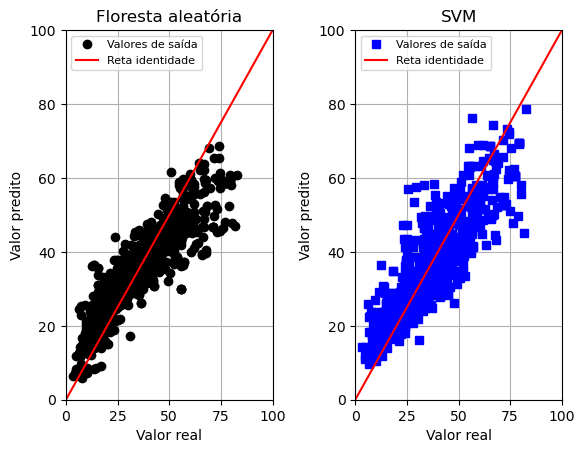

In [53]:
# Avaliação gráfica das predições realizadas com os dois modelos desenvolvido:

y_pred_test_forest = scaler_output.inverse_transform(y_pred_test_norm_forest.reshape(-1, 1))
y_pred_test_svm = scaler_output.inverse_transform(y_pred_test_norm_svm.reshape(-1, 1))

plt.subplot(1, 2, 1)
plt.title('Floresta aleatória')
plt.plot(y_test, y_pred_test_forest, 'ko', label='Valores de saída')
plt.plot([0, 100], [0, 100], 'r-', label='Reta identidade')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('Valor real', fontsize=10)
plt.ylabel('Valor predito', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True)


plt.subplot(1, 2, 2)
plt.title('SVM')
plt.plot(y_test, y_pred_test_svm, 'bs', label='Valores de saída')
plt.xlabel('Valor real', fontsize=10)
plt.ylabel('Valor predito', fontsize=10)
plt.plot([0, 100], [0, 100], 'r-', label='Reta identidade')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.legend(fontsize=8)
plt.grid(True)

plt.subplots_adjust(wspace=0.4)
plt.show()